<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Practica-05" data-toc-modified-id="Practica-05-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practica 05</a></span></li><li><span><a href="#Crisp-DM" data-toc-modified-id="Crisp-DM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Crisp DM</a></span><ul class="toc-item"><li><span><a href="#Objetivo" data-toc-modified-id="Objetivo-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Objetivo</a></span></li><li><span><a href="#Comprensión-del-negocio" data-toc-modified-id="Comprensión-del-negocio-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Comprensión del negocio</a></span></li><li><span><a href="#Comprensión-de-los-datos" data-toc-modified-id="Comprensión-de-los-datos-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Comprensión de los datos</a></span></li><li><span><a href="#Preparación-de-los-datos" data-toc-modified-id="Preparación-de-los-datos-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Preparación de los datos</a></span><ul class="toc-item"><li><span><a href="#Limpieza" data-toc-modified-id="Limpieza-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Limpieza</a></span></li><li><span><a href="#Transformación" data-toc-modified-id="Transformación-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Transformación</a></span></li></ul></li><li><span><a href="#Modelado" data-toc-modified-id="Modelado-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Modelado</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Evaluación" data-toc-modified-id="Evaluación-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Evaluación</a></span></li><li><span><a href="#Despliegue" data-toc-modified-id="Despliegue-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Despliegue</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Evaluación" data-toc-modified-id="Evaluación-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>Evaluación</a></span></li><li><span><a href="#Despliegue" data-toc-modified-id="Despliegue-2.5.6"><span class="toc-item-num">2.5.6&nbsp;&nbsp;</span>Despliegue</a></span></li></ul></li></ul></li></ul></div>

## Practica 05

## Crisp DM

### Objetivo

Predecir el `Type 1` de un Pokémon basándonos en sus estadísticas (HP, Attack, Defense, SP Atk, SP Def, Speed).

### Comprensión del negocio 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_archivo_csv = 'Pokemon.csv'
df = pd.read_csv(ruta_archivo_csv)

In [3]:
print(df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Comprensión de los datos

<div class="alert alert-block alert-info">
¿Cuántos Pokémon hay de cada tipo?
</div>

In [5]:
frequency_map = df['Type 1'].value_counts().to_dict()
print (frequency_map)

{'Water': 112, 'Normal': 98, 'Grass': 70, 'Bug': 69, 'Psychic': 57, 'Fire': 52, 'Electric': 44, 'Rock': 44, 'Dragon': 32, 'Ground': 32, 'Ghost': 32, 'Dark': 31, 'Poison': 28, 'Steel': 27, 'Fighting': 27, 'Ice': 24, 'Fairy': 17, 'Flying': 4}


In [6]:
frequency_map2 = df['Type 2'].value_counts().to_dict()
print (frequency_map2)

{'Flying': 97, 'Ground': 35, 'Poison': 34, 'Psychic': 33, 'Fighting': 26, 'Grass': 25, 'Fairy': 23, 'Steel': 22, 'Dark': 20, 'Dragon': 18, 'Water': 14, 'Ghost': 14, 'Ice': 14, 'Rock': 14, 'Fire': 12, 'Electric': 6, 'Normal': 4, 'Bug': 3}


In [7]:
total_frequency_map = {}

# Itera sobre las claves en el primer mapa de frecuencia y suma los valores
for key, value in frequency_map.items():
    total_frequency_map[key] = total_frequency_map.get(key, 0) + value

# Itera sobre las claves en el segundo mapa de frecuencia y suma los valores
for key, value in frequency_map2.items():
    total_frequency_map[key] = total_frequency_map.get(key, 0) + value

# Imprime el mapa de frecuencia total
print("Mapa de frecuencia total:")
print(total_frequency_map)

Mapa de frecuencia total:
{'Water': 126, 'Normal': 102, 'Grass': 95, 'Bug': 72, 'Psychic': 90, 'Fire': 64, 'Electric': 50, 'Rock': 58, 'Dragon': 50, 'Ground': 67, 'Ghost': 46, 'Dark': 51, 'Poison': 62, 'Steel': 49, 'Fighting': 53, 'Ice': 38, 'Fairy': 40, 'Flying': 101}


<div class="alert alert-block alert-info">
¿Faltan valores en el conjunto de datos?</div>

In [8]:
valores_faltantes = df.isna().sum()
print(valores_faltantes)

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


<div class="alert alert-block alert-info">
¿Cómo se distribuyen las estadisticas entre los diferentes pokemones?
</div>

**Total**

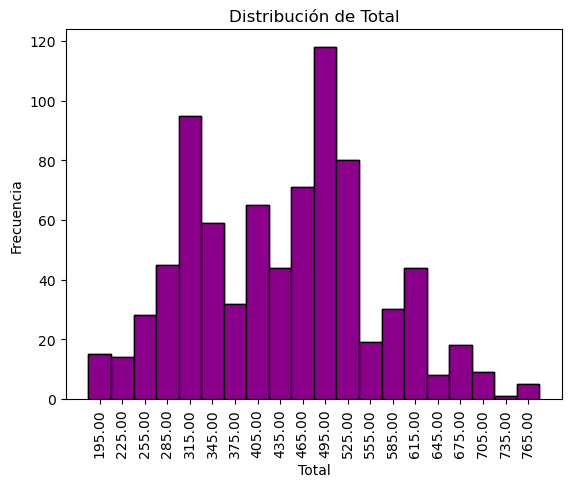

In [9]:
# Crear el histograma y obtener los valores
values, bins, _ = plt.hist(df['Total'], bins=20, color='darkmagenta', edgecolor='black')

# Obtener las coordenadas x de las barras
x_coordinates = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

# Visualizar la distribución de la dimensión columna1
plt.bar(x_coordinates, values, width=bins[1] - bins[0], color='darkmagenta', edgecolor='black')

# Etiquetar los valores en el eje x
plt.xticks(x_coordinates, ['{:.2f}'.format(val) for val in x_coordinates], rotation='vertical')

plt.xlabel('Total')
plt.ylabel('Frecuencia')
plt.title('Distribución de Total')
plt.show()

**HP**

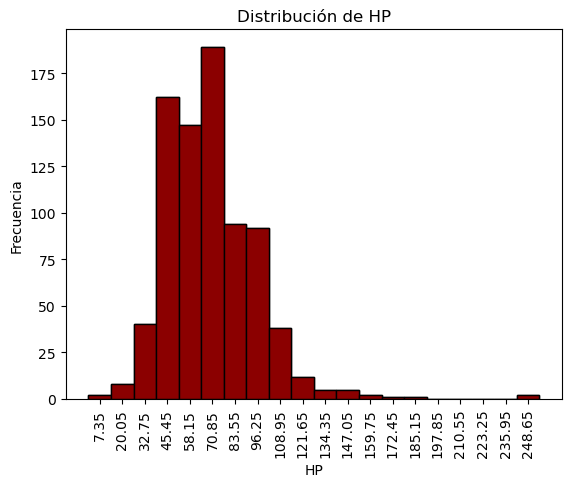

In [10]:
# Crear el histograma y obtener los valores
values, bins, _ = plt.hist(df['HP'], bins=20, color='darkred', edgecolor='black')

# Obtener las coordenadas x de las barras
x_coordinates = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

# Visualizar la distribución de la dimensión columna1
plt.bar(x_coordinates, values, width=bins[1] - bins[0], color='darkred', edgecolor='black')

# Etiquetar los valores en el eje x
plt.xticks(x_coordinates, ['{:.2f}'.format(val) for val in x_coordinates], rotation='vertical')

plt.xlabel('HP')
plt.ylabel('Frecuencia')
plt.title('Distribución de HP')
plt.show()

**Attack**

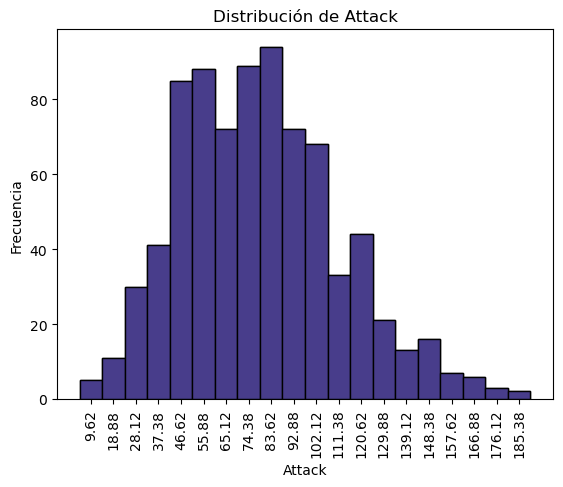

In [11]:
# Crear el histograma y obtener los valores
values, bins, _ = plt.hist(df['Attack'], bins=20, color='darkslateblue', edgecolor='black')

# Obtener las coordenadas x de las barras
x_coordinates = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

# Visualizar la distribución de la dimensión columna1
plt.bar(x_coordinates, values, width=bins[1] - bins[0], color='darkslateblue', edgecolor='black')

# Etiquetar los valores en el eje x
plt.xticks(x_coordinates, ['{:.2f}'.format(val) for val in x_coordinates], rotation='vertical')

plt.xlabel('Attack')
plt.ylabel('Frecuencia')
plt.title('Distribución de Attack')
plt.show()

**Defense**

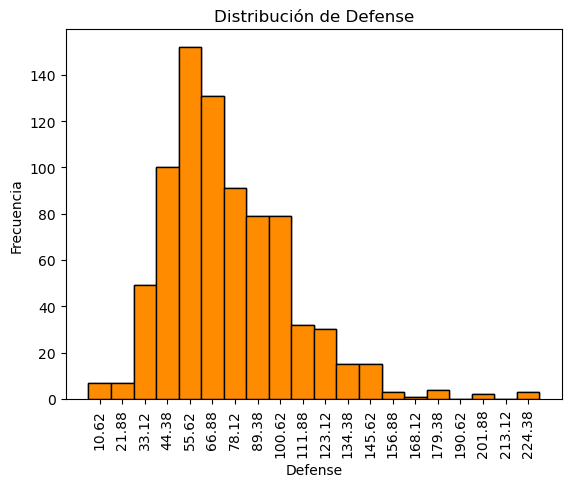

In [12]:
# Crear el histograma y obtener los valores
values, bins, _ = plt.hist(df['Defense'], bins=20, color='darkorange', edgecolor='black')

# Obtener las coordenadas x de las barras
x_coordinates = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

# Visualizar la distribución de la dimensión columna1
plt.bar(x_coordinates, values, width=bins[1] - bins[0], color='darkorange', edgecolor='black')

# Etiquetar los valores en el eje x
plt.xticks(x_coordinates, ['{:.2f}'.format(val) for val in x_coordinates], rotation='vertical')

plt.xlabel('Defense')
plt.ylabel('Frecuencia')
plt.title('Distribución de Defense')
plt.show()

**Sp. Atk**

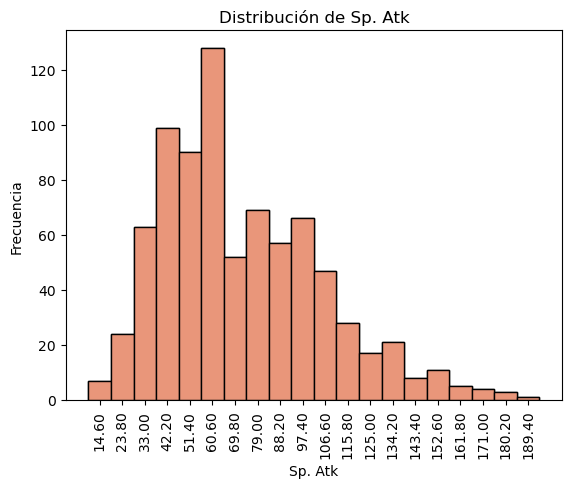

In [13]:
# Crear el histograma y obtener los valores
values, bins, _ = plt.hist(df['Sp. Atk'], bins=20, color='darksalmon', edgecolor='black')

# Obtener las coordenadas x de las barras
x_coordinates = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

# Visualizar la distribución de la dimensión columna1
plt.bar(x_coordinates, values, width=bins[1] - bins[0], color='darksalmon', edgecolor='black')

# Etiquetar los valores en el eje x
plt.xticks(x_coordinates, ['{:.2f}'.format(val) for val in x_coordinates], rotation='vertical')

plt.xlabel('Sp. Atk')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sp. Atk')
plt.show()

**Sp. Def**

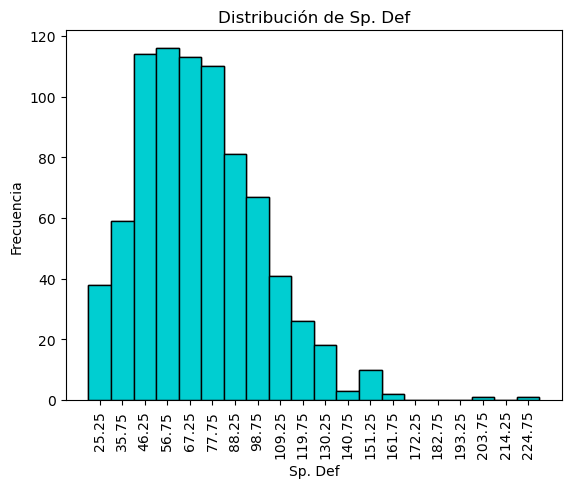

In [14]:
# Crear el histograma y obtener los valores
values, bins, _ = plt.hist(df['Sp. Def'], bins=20, color='darkturquoise', edgecolor='black')

# Obtener las coordenadas x de las barras
x_coordinates = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

# Visualizar la distribución de la dimensión columna1
plt.bar(x_coordinates, values, width=bins[1] - bins[0], color='darkturquoise', edgecolor='black')

# Etiquetar los valores en el eje x
plt.xticks(x_coordinates, ['{:.2f}'.format(val) for val in x_coordinates], rotation='vertical')

plt.xlabel('Sp. Def')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sp. Def')
plt.show()

**Speed**

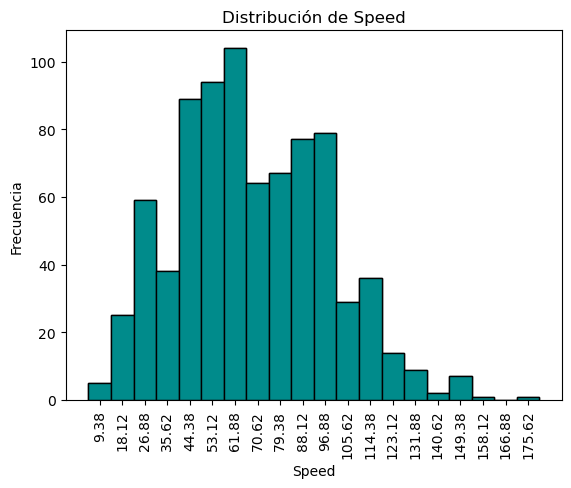

In [15]:
# Crear el histograma y obtener los valores
values, bins, _ = plt.hist(df['Speed'], bins=20, color='darkcyan', edgecolor='black')

# Obtener las coordenadas x de las barras
x_coordinates = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

# Visualizar la distribución de la dimensión columna1
plt.bar(x_coordinates, values, width=bins[1] - bins[0], color='darkcyan', edgecolor='black')

# Etiquetar los valores en el eje x
plt.xticks(x_coordinates, ['{:.2f}'.format(val) for val in x_coordinates], rotation='vertical')

plt.xlabel('Speed')
plt.ylabel('Frecuencia')
plt.title('Distribución de Speed')
plt.show()

**Generation**

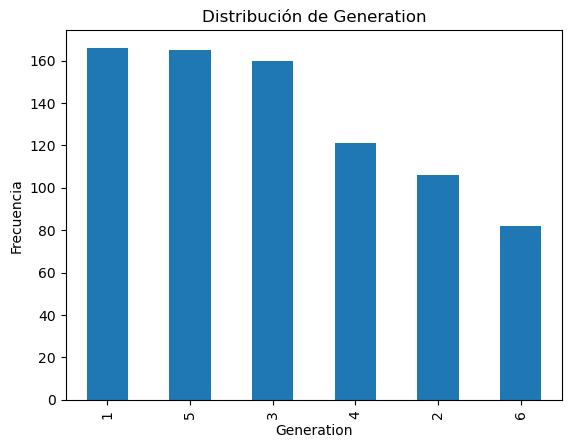

In [16]:
type1_counts = df['Generation'].value_counts()
type1_counts.plot(kind='bar')
plt.xlabel('Generation')
plt.ylabel('Frecuencia')
plt.title('Distribución de Generation')
plt.show()

### Preparación de los datos 

#### Limpieza

In [17]:
df2 = df.copy()

In [18]:
print(df2)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [19]:
df2.drop('Type 1', axis=1, inplace=True)

In [20]:
print(df2)

       #                   Name  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0      1              Bulbasaur  Poison    318  45      49       49       65   
1      2                Ivysaur  Poison    405  60      62       63       80   
2      3               Venusaur  Poison    525  80      82       83      100   
3      3  VenusaurMega Venusaur  Poison    625  80     100      123      122   
4      4             Charmander     NaN    309  39      52       43       60   
..   ...                    ...     ...    ...  ..     ...      ...      ...   
795  719                Diancie   Fairy    600  50     100      150      100   
796  719    DiancieMega Diancie   Fairy    700  50     160      110      160   
797  720    HoopaHoopa Confined   Ghost    600  80     110       60      150   
798  720     HoopaHoopa Unbound    Dark    680  80     160       60      170   
799  721              Volcanion   Water    600  80     110      120      130   

     Sp. Def  Speed  Generation  Legend

In [21]:
df2.dropna(subset=['Type 2'], inplace=True)

# Reinicia el índice después de eliminar filas
df2.reset_index(drop=True, inplace=True)

# Imprime el DataFrame actualizado
print(df2)

       #                   Name  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0      1              Bulbasaur  Poison    318  45      49       49       65   
1      2                Ivysaur  Poison    405  60      62       63       80   
2      3               Venusaur  Poison    525  80      82       83      100   
3      3  VenusaurMega Venusaur  Poison    625  80     100      123      122   
4      6              Charizard  Flying    534  78      84       78      109   
..   ...                    ...     ...    ...  ..     ...      ...      ...   
409  719                Diancie   Fairy    600  50     100      150      100   
410  719    DiancieMega Diancie   Fairy    700  50     160      110      160   
411  720    HoopaHoopa Confined   Ghost    600  80     110       60      150   
412  720     HoopaHoopa Unbound    Dark    680  80     160       60      170   
413  721              Volcanion   Water    600  80     110      120      130   

     Sp. Def  Speed  Generation  Legend

In [22]:
df2.rename(columns={'Type 2': 'Type 1'}, inplace=True)

In [23]:
print(df2)

       #                   Name  Type 1  Total  HP  Attack  Defense  Sp. Atk  \
0      1              Bulbasaur  Poison    318  45      49       49       65   
1      2                Ivysaur  Poison    405  60      62       63       80   
2      3               Venusaur  Poison    525  80      82       83      100   
3      3  VenusaurMega Venusaur  Poison    625  80     100      123      122   
4      6              Charizard  Flying    534  78      84       78      109   
..   ...                    ...     ...    ...  ..     ...      ...      ...   
409  719                Diancie   Fairy    600  50     100      150      100   
410  719    DiancieMega Diancie   Fairy    700  50     160      110      160   
411  720    HoopaHoopa Confined   Ghost    600  80     110       60      150   
412  720     HoopaHoopa Unbound    Dark    680  80     160       60      170   
413  721              Volcanion   Water    600  80     110      120      130   

     Sp. Def  Speed  Generation  Legend

In [24]:
valores_faltantes = df2.isna().sum()
print(valores_faltantes)

#             0
Name          0
Type 1        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


In [25]:
df.drop('Type 2', axis=1, inplace=True)

In [26]:
print(df)

       #                   Name   Type 1  Total  HP  Attack  Defense  Sp. Atk  \
0      1              Bulbasaur    Grass    318  45      49       49       65   
1      2                Ivysaur    Grass    405  60      62       63       80   
2      3               Venusaur    Grass    525  80      82       83      100   
3      3  VenusaurMega Venusaur    Grass    625  80     100      123      122   
4      4             Charmander     Fire    309  39      52       43       60   
..   ...                    ...      ...    ...  ..     ...      ...      ...   
795  719                Diancie     Rock    600  50     100      150      100   
796  719    DiancieMega Diancie     Rock    700  50     160      110      160   
797  720    HoopaHoopa Confined  Psychic    600  80     110       60      150   
798  720     HoopaHoopa Unbound  Psychic    680  80     160       60      170   
799  721              Volcanion     Fire    600  80     110      120      130   

     Sp. Def  Speed  Genera

In [27]:
dfmerged = pd.concat([df, df2], ignore_index=True)

In [28]:
print(dfmerged)

        #                   Name Type 1  Total  HP  Attack  Defense  Sp. Atk  \
0       1              Bulbasaur  Grass    318  45      49       49       65   
1       2                Ivysaur  Grass    405  60      62       63       80   
2       3               Venusaur  Grass    525  80      82       83      100   
3       3  VenusaurMega Venusaur  Grass    625  80     100      123      122   
4       4             Charmander   Fire    309  39      52       43       60   
...   ...                    ...    ...    ...  ..     ...      ...      ...   
1209  719                Diancie  Fairy    600  50     100      150      100   
1210  719    DiancieMega Diancie  Fairy    700  50     160      110      160   
1211  720    HoopaHoopa Confined  Ghost    600  80     110       60      150   
1212  720     HoopaHoopa Unbound   Dark    680  80     160       60      170   
1213  721              Volcanion  Water    600  80     110      120      130   

      Sp. Def  Speed  Generation  Legen

#### Transformación

In [29]:
mapeo_categorias = {'Water': 1, 'Normal': 2, 'Grass': 3, 'Bug': 4, 'Psychic': 5, 'Fire': 6, 'Electric': 7, 'Rock': 8, 'Dragon': 9, 'Ground': 10, 'Ghost': 11, 'Dark': 12, 'Poison': 13, 'Steel': 14, 'Fighting': 15, 'Ice': 16, 'Fairy': 17, 'Flying': 18}

dfmerged['Type 1'] = dfmerged['Type 1'].replace(mapeo_categorias)

print(dfmerged)

        #                   Name  Type 1  Total  HP  Attack  Defense  Sp. Atk  \
0       1              Bulbasaur       3    318  45      49       49       65   
1       2                Ivysaur       3    405  60      62       63       80   
2       3               Venusaur       3    525  80      82       83      100   
3       3  VenusaurMega Venusaur       3    625  80     100      123      122   
4       4             Charmander       6    309  39      52       43       60   
...   ...                    ...     ...    ...  ..     ...      ...      ...   
1209  719                Diancie      17    600  50     100      150      100   
1210  719    DiancieMega Diancie      17    700  50     160      110      160   
1211  720    HoopaHoopa Confined      11    600  80     110       60      150   
1212  720     HoopaHoopa Unbound      12    680  80     160       60      170   
1213  721              Volcanion       1    600  80     110      120      130   

      Sp. Def  Speed  Gener

In [30]:
mapeo_categorias = {False: 0, True: 1}

dfmerged['Legendary'] = dfmerged['Legendary'].replace(mapeo_categorias)

print(dfmerged)

        #                   Name  Type 1  Total  HP  Attack  Defense  Sp. Atk  \
0       1              Bulbasaur       3    318  45      49       49       65   
1       2                Ivysaur       3    405  60      62       63       80   
2       3               Venusaur       3    525  80      82       83      100   
3       3  VenusaurMega Venusaur       3    625  80     100      123      122   
4       4             Charmander       6    309  39      52       43       60   
...   ...                    ...     ...    ...  ..     ...      ...      ...   
1209  719                Diancie      17    600  50     100      150      100   
1210  719    DiancieMega Diancie      17    700  50     160      110      160   
1211  720    HoopaHoopa Confined      11    600  80     110       60      150   
1212  720     HoopaHoopa Unbound      12    680  80     160       60      170   
1213  721              Volcanion       1    600  80     110      120      130   

      Sp. Def  Speed  Gener

### Modelado

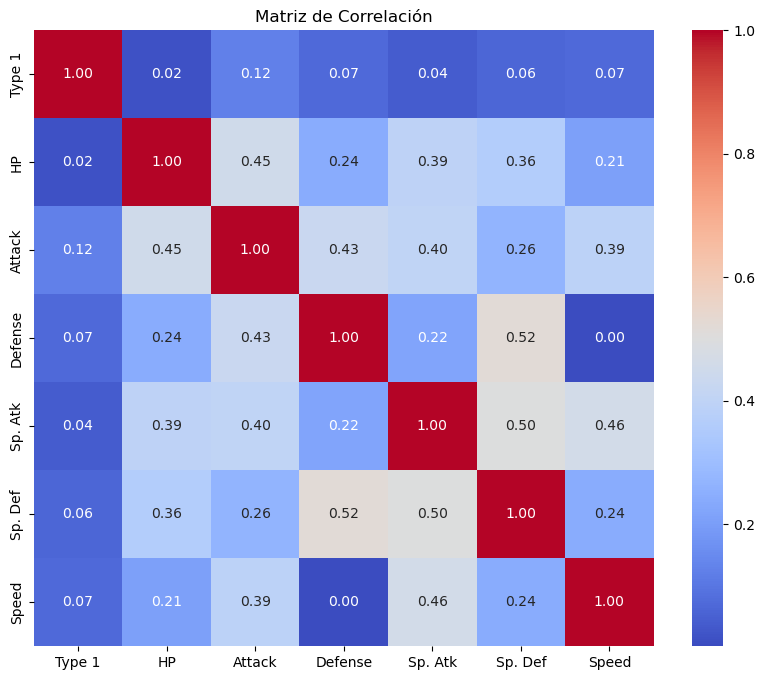

In [32]:
dfcorrel = dfmerged.copy()
dfcorrel.drop('Name', axis=1, inplace=True)
dfcorrel.drop('#', axis=1, inplace=True)
dfcorrel.drop('Total', axis=1, inplace=True)
dfcorrel.drop('Generation', axis=1, inplace=True)
dfcorrel.drop('Legendary', axis=1, inplace=True)

# Calcular la matriz de correlación
correlation_matrix = dfcorrel.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

#### Random Forest

In [33]:
print(dfcorrel)

      Type 1  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0          3  45      49       49       65       65     45
1          3  60      62       63       80       80     60
2          3  80      82       83      100      100     80
3          3  80     100      123      122      120     80
4          6  39      52       43       60       50     65
...      ...  ..     ...      ...      ...      ...    ...
1209      17  50     100      150      100      150     50
1210      17  50     160      110      160      110    110
1211      11  80     110       60      150      130     70
1212      12  80     160       60      170      130     80
1213       1  80     110      120      130       90     70

[1214 rows x 7 columns]


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
x = dfcorrel[features]  # Características
y = dfcorrel['Type 1']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [37]:
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred =clf.predict(x_test)

#### Evaluación

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.09


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.14      0.06      0.09        49
           2       0.23      0.38      0.29        26
           3       0.06      0.08      0.07        26
           4       0.10      0.09      0.09        23
           5       0.13      0.12      0.12        25
           6       0.25      0.07      0.11        27
           7       0.09      0.12      0.11        16
           8       0.14      0.19      0.16        16
           9       0.06      0.06      0.06        16
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00        12
          12       0.11      0.17      0.13        12
          13       0.00      0.00      0.00        18
          14       0.00      0.00      0.00        22
          15       0.06      0.07      0.07        14
          16       0.00      0.00      0.00        10
          17       0.10      0.10      0.10        10
          18       0.06    

In [41]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [42]:
print(cf_matrix)

[[ 3  5  7  1  2  2  3  3  2  5  1  1  2  1  3  3  2  3]
 [ 1 10  2  0  2  0  0  0  0  2  0  0  0  0  1  0  2  6]
 [ 3  0  2  1  2  1  3  0  1  1  1  3  6  0  1  0  0  1]
 [ 0  4  1  2  0  0  2  1  1  2  1  1  2  2  0  0  0  4]
 [ 2  2  3  2  3  0  1  1  1  0  0  1  0  1  3  1  2  2]
 [ 3  5  0  0  2  2  3  2  0  1  0  2  2  1  2  0  0  2]
 [ 2  1  0  1  0  0  2  0  1  1  0  1  0  1  0  6  0  0]
 [ 0  0  1  2  0  0  0  3  0  7  0  0  0  0  1  1  0  1]
 [ 0  1  0  0  2  1  1  1  1  2  0  1  0  0  1  1  0  4]
 [ 0  3  1  1  1  1  0  1  3  0  0  0  0  1  1  0  0  2]
 [ 0  0  3  0  0  0  1  0  0  1  0  1  2  3  0  1  0  0]
 [ 2  1  1  0  0  0  1  0  0  1  0  2  1  0  1  1  1  0]
 [ 2  2  4  4  0  0  1  0  1  2  1  1  0  0  0  0  0  0]
 [ 1  0  2  3  2  0  2  5  1  1  0  2  0  0  1  0  2  0]
 [ 0  2  1  0  0  1  0  1  0  3  0  0  2  1  1  0  0  2]
 [ 1  0  1  0  1  0  1  0  1  2  0  0  0  0  0  0  0  3]
 [ 1  1  1  0  3  0  0  2  1  0  0  0  0  0  0  0  1  0]
 [ 0  7  1  3  3  0  1  1  3  1

<Axes: >

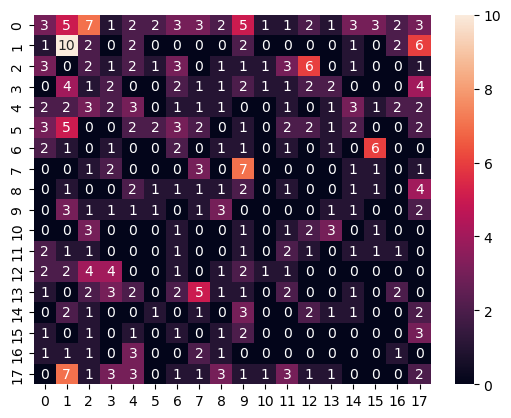

In [43]:
sns.heatmap(cf_matrix, annot=True)

#### Despliegue

In [44]:
user_data = pd.DataFrame({
    'HP': [40],
    'Attack': [50],
    'Defense': [50],
    'Sp. Atk': [65],
    'Sp. Def': [65],
    'Speed': [40]
})

In [45]:
predicted_type = clf.predict(user_data)

In [46]:
print('El tipo predicho del Pokémon es:', predicted_type[0])

El tipo predicho del Pokémon es: 13


#### Decision Trees

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
x = dfcorrel[features]  # Características
y = dfcorrel['Type 1']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [50]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred = clf.predict(x_test)

#### Evaluación

In [52]:
accuracy = accuracy_score(y_test, y_pred)

In [53]:
print(accuracy)

0.07671232876712329


In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [55]:
print(conf_matrix)

[[4 5 8 0 4 1 1 4 2 5 1 2 2 0 4 1 2 3]
 [0 7 1 1 2 0 1 1 0 1 0 3 3 0 0 1 2 3]
 [4 1 2 0 1 1 1 0 1 2 1 3 6 0 2 0 0 1]
 [2 2 1 3 0 0 2 0 0 2 0 3 2 2 0 0 0 4]
 [4 1 1 3 2 1 0 1 1 0 0 0 2 1 3 1 2 2]
 [3 2 3 0 2 1 1 0 0 1 1 2 2 1 2 4 0 2]
 [1 1 5 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1]
 [0 0 2 4 0 0 0 3 1 4 0 0 0 0 0 1 0 1]
 [0 0 0 0 2 1 1 1 0 1 0 3 0 0 0 2 0 5]
 [0 1 1 0 1 1 1 1 3 0 0 0 2 1 0 0 0 3]
 [0 0 2 0 0 0 1 1 0 1 0 1 2 3 0 1 0 0]
 [1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 2 1 0]
 [3 1 3 4 0 0 0 0 1 1 1 2 1 0 1 0 0 0]
 [3 1 3 1 2 0 2 3 0 1 0 2 1 0 1 0 2 0]
 [1 2 0 0 0 1 0 1 0 2 0 2 1 1 2 1 0 0]
 [1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 2 3]
 [2 1 0 0 1 0 2 2 1 0 0 0 0 0 0 0 1 0]
 [1 9 1 3 2 1 2 1 3 1 1 2 0 1 0 0 0 0]]


<Axes: >

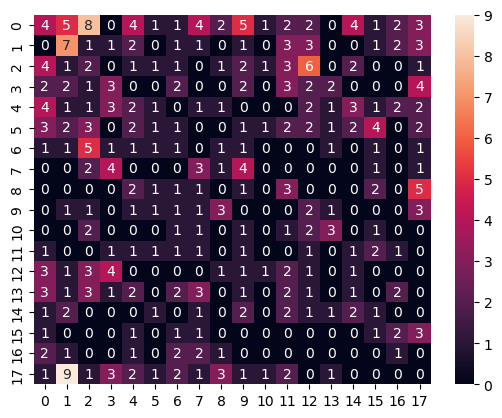

In [56]:
sns.heatmap(conf_matrix, annot=True)

#### Despliegue

In [57]:
user_data = pd.DataFrame({
    'HP': [40],
    'Attack': [50],
    'Defense': [50],
    'Sp. Atk': [65],
    'Sp. Def': [65],
    'Speed': [40]
})

In [58]:
predicted_type = clf.predict(user_data)

In [59]:
print('El tipo predicho del Pokémon es:', predicted_type[0])

El tipo predicho del Pokémon es: 3
